In [205]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.io as scipyio
import pandas as pd
from IPython.display import display
import seaborn as sns
from __future__ import division
import json
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from math import sqrt
from random import randint
from scipy.optimize import minimize

In [1]:
import numpy as np
import pickle
import json
import pandas as pd
import sys
from sys import stdin
import os

def formatData(dataS):
    finS = []
    ind = 0

    for r in dataS:
        curr = 0
        finS.append({})
        for i in r:
            if curr == len(passwordarr):
                break
                
            if i['key'] == passwordarr[curr]:
                keyVal = i['key'] + '-' +str(curr) + '-'
                finS[ind][keyVal+'kftime'] = i['kftime']
                finS[ind][keyVal+'ftime'] = i['ftime']
                finS[ind][keyVal+'time'] = i['time']
                curr+=1
            else:
                try:
                    finS[ind]['m'] += 1
                except:
                    finS[ind]['m'] = 1
            
        finS[ind]['totaltime'] = sum([x['time'] for x in r])

        ind += 1
        
    return finS
    

print 'Enter username'
username = stdin.readline()

# try:
with open('../electron-app/data/data-' + username + '.txt') as fS:
    raw = '[' + fS.read()[:-1] + ']'
    dataS = (json.loads(raw))

# except:
#     print 'Invalid file'
# #     exit()

finS = formatData(dataS)
dfS = pd.DataFrame(finS)

if not os.path.exists('./output/csv/'):
    os.makedirs('./output/csv/')

if not os.path.exists('./output/pickle/'):
    os.makedirs('./output/pickle/')

with open('./output/csv/' + username + '.csv', 'w+') as fscv:
    fscv.write(finS.to_csv())

with open('./output/pickle/' + username + '.pkl', 'w+') as fpickle:
    fpickle.write(finS.to_matrix())

Enter username


IOError: [Errno 2] No such file or directory: '../electron-app/data/data-.txt'

In [217]:
password = 'Hello good sir'
passwordarr = list(password)

def formatData(dataS):
    finS = []
    ind = 0

    for r in dataS:
        curr = 0
        finS.append({})
        for i in r:
            if curr == len(passwordarr):
                break
                
            if i['key'] == passwordarr[curr]:
                keyVal = i['key'] + '-' +str(curr) + '-'
                finS[ind][keyVal+'kftime'] = i['kftime']
                finS[ind][keyVal+'ftime'] = i['ftime']
                finS[ind][keyVal+'time'] = i['time']
                curr+=1
            else:
                try:
                    finS[ind]['m'] += 1
                except:
                    finS[ind]['m'] = 1
            
        finS[ind]['totaltime'] = sum([x['time'] for x in r])

        ind += 1
        
    return finS
    

with open('../electron-app/data/data-Saumitra.txt') as fS:
    raw = '[' + fS.read()[:-1] + ']'
    dataS = (json.loads(raw))
    
with open('../electron-app/data/data-Ishaan.txt') as fI:
    raw = '[' + fI.read()[:-1] + ']'
    dataI = (json.loads(raw))
    
with open('../electron-app/data/data-TesterI.txt') as fN:
    raw = '[' + fN.read()[:-1] + ']'
    dataN = (json.loads(raw))

finS = formatData(dataS)
finN = formatData(dataN)
finI = formatData(dataI)

dfS = pd.DataFrame(finS)

dfS.drop(['r-13-time', 'r-13-kftime', 'r-13-ftime'], axis=1, inplace=True)

dfI = pd.DataFrame(finI)
dfN = pd.DataFrame(finN)
try:
    dfN.drop(['r-13-time', 'r-13-kftime', 'r-13-ftime'], axis=1, inplace=True)
except:
    pass

dfS['m'].fillna( 0, inplace=True)
dfI['m'].fillna( 0, inplace=True)
dfN['m'].fillna(0, inplace=True)

dfS.fillna(dfS.mean(), inplace=True)
dfI.fillna(dfI.mean(), inplace=True)
dfN.fillna(dfN.mean(), inplace=True)

dfS['totaltime'].fillna(dfS['totaltime'].mean())
dfI['totaltime'].fillna(dfI['totaltime'].mean())

display(dfS.head())
display(dfI.head())
display(dfN.tail())

dfS.to_csv()

,-10-ftime,-10-kftime,-10-time,-5-ftime,-5-kftime,-5-time,H-0-ftime,H-0-kftime,H-0-time,d-9-ftime,...,o-7-ftime,o-7-kftime,o-7-time,o-8-ftime,o-8-kftime,o-8-time,s-11-ftime,s-11-kftime,s-11-time,totaltime
0,9,68,59,630,744,114,4924.470588,63,63,67,...,29,101,72,60,105,45,63,158,95,1192
1,34,89,55,92,187,95,695.000000,766,71,23,...,18,89,71,43,122,79,32,119,87,1220
2,48,119,71,133,224,91,569.000000,628,59,69,...,65,124,59,62,133,71,27,127,100,1552
3,19,82,63,243,384,141,3039.000000,3132,93,34,...,46,97,51,86,153,67,39,149,110,1416
4,0,194,194,0,239,239,0.000000,159,159,0,...,0,213,213,0,195,195,0,151,151,10121


,-10-ftime,-10-kftime,-10-time,-5-ftime,-5-kftime,-5-time,H-0-ftime,H-0-kftime,H-0-time,d-9-ftime,...,o-7-ftime,o-7-kftime,o-7-time,o-8-ftime,o-8-kftime,o-8-time,s-11-ftime,s-11-kftime,s-11-time,totaltime
0,0,576,576,0,515,515,0,623,623,0,...,0,173,173,0,228,228,0,254,254,137773
1,0,265,265,0,882,882,0,582,582,0,...,0,185,185,0,198,198,0,206,206,8893
2,0,381,381,0,654,654,0,396,396,0,...,0,168,168,0,283,283,0,180,180,5073
3,0,270,270,0,317,317,0,409,409,0,...,0,195,195,0,248,248,0,652,652,7183
4,0,489,489,0,669,669,0,427,427,0,...,0,224,224,0,356,356,0,199,199,5145


,-10-ftime,-10-kftime,-10-time,-5-ftime,-5-kftime,-5-time,H-0-ftime,H-0-kftime,H-0-time,d-9-ftime,...,o-7-ftime,o-7-kftime,o-7-time,o-8-ftime,o-8-kftime,o-8-time,s-11-ftime,s-11-kftime,s-11-time,totaltime
0,75,134,59,197,260,63,968.0,91,91,101,...,101,160,59,41,96,55,84,187,103,1279
1,1032,1099,67,183,246,63,1025.0,1120,95,46,...,93,156,63,54,113,59,143,218,75,1080
2,80,167,87,244,303,59,911.0,998,87,65,...,86,149,63,55,126,71,86,201,115,1282


', -10-ftime, -10-kftime, -10-time, -5-ftime, -5-kftime, -5-time,H-0-ftime,H-0-kftime,H-0-time,d-9-ftime,d-9-kftime,d-9-time,e-1-ftime,e-1-kftime,e-1-time,g-6-ftime,g-6-kftime,g-6-time,i-12-ftime,i-12-kftime,i-12-time,l-2-ftime,l-2-kftime,l-2-time,l-3-ftime,l-3-kftime,l-3-time,m,o-4-ftime,o-4-kftime,o-4-time,o-7-ftime,o-7-kftime,o-7-time,o-8-ftime,o-8-kftime,o-8-time,s-11-ftime,s-11-kftime,s-11-time,totaltime\n0,9,68,59,630,744,114,4924.47058824,63,63,67,162,95,13,125,112,0,84,84,0.0,75.0,75.0,36,111,75,26,153,127,0.0,279,367,88,29,101,72,60,105,45,63,158,95,1192\n1,34,89,55,92,187,95,695.0,766,71,23,117,94,17,108,91,44,123,79,0.0,75.0,75.0,96,163,67,63,162,99,2.0,1142,1242,100,18,89,71,43,122,79,32,119,87,1220\n2,48,119,71,133,224,91,569.0,628,59,69,176,107,989,1080,91,0,67,67,0.0,79.0,79.0,27,92,65,58,129,71,5.0,79,166,87,65,124,59,62,133,71,27,127,100,1552\n3,19,82,63,243,384,141,3039.0,3132,93,34,150,116,0,123,123,0,95,95,0.0,91.0,91.0,1097,1136,39,85,160,75,2.0,131,218,87,46,97,51

137981.575
1363.0


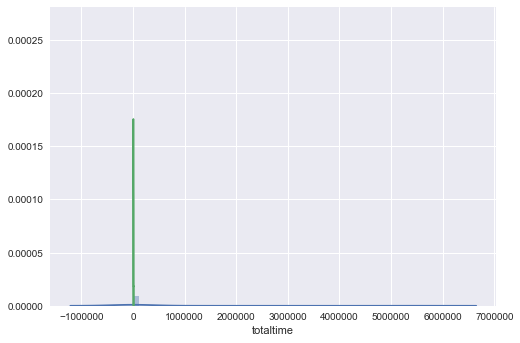

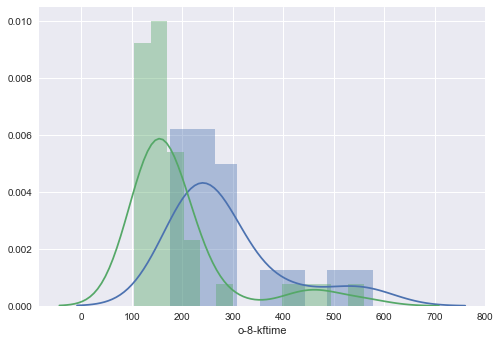

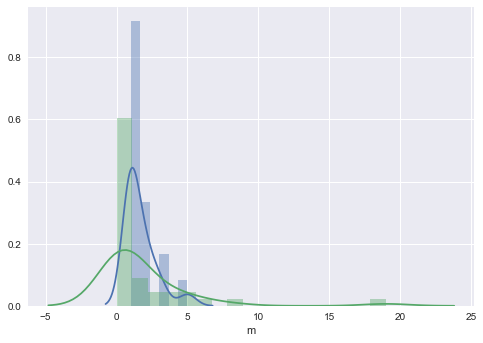

In [207]:
print dfS['totaltime'].mean()
print dfS['totaltime'].median()

sns.distplot(dfS['totaltime'])

totaltime = dfI['totaltime']
totaltime = totaltime[totaltime < totaltime.max()]

sns.distplot(totaltime)
plt.show()

sns.distplot(dfI['o-8-kftime'])
sns.distplot(dfS['o-8-kftime'])
plt.show()

sns.distplot(dfI['m'])
sns.distplot(dfS['m'])
plt.show()

In [208]:
arS = dfS.as_matrix()
arI = dfI.as_matrix()

y = np.r_[np.ones(arS.shape[0]), np.zeros(arI.shape[0])]
X = np.r_[arS, arI]

timecol = X[:, -1]
y = np.delete(y, timecol.argmax(), axis=0)

X = X[timecol < timecol.max()]
timecol = X[:, -1]
X[:, -1] =  300*(((timecol - timecol.min()))/ (timecol.max() - timecol.min()))
P = dfN.as_matrix()
timecol = P[:, -1]
P[:, -1] = 300*(((timecol - timecol.min()))/ (timecol.max() - timecol.min()))

In [209]:
gnb = GaussianNB()
y_pred = gnb.fit(X, y).predict(P)
print 'Predictions', y_pred
print 'Accuracy on predicted', y_pred[y_pred == 1].shape[0]/y_pred.shape[0] * 100
# print X, y
svc = SVC(probability=True)
fit = svc.fit(X, y)
print fit.predict(P)
print fit.predict_proba(P)


Predictions [ 1.  1.  1.]
Accuracy on predicted 100.0
[ 1.  1.  1.]
[[ 0.30464397  0.69535603]
 [ 0.30464397  0.69535603]
 [ 0.30464397  0.69535603]]


In [210]:
# Sigmoid function
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def sigmoid_gradient(z):
    return sigmoid(z)*(1- sigmoid(z))

def randInitializeWeights(L_in, L_out):
    ep_init = sqrt(6)/sqrt(L_in + L_out)
    
    return np.random.uniform(-ep_init, ep_init, size=(L_out, L_in))
        

def create_nn_model(Theta1, Theta2, X):
    m, n = X.shape
    XX = np.append(np.ones((m, 1)), X, axis=1)
    h = sigmoid(Theta1.dot(XX.T))
    l1 = np.append(np.ones((1, h.shape[1])), h, 0)
    h1 = sigmoid(Theta2.dot(l1))
    ans = np.argmax(h1, axis=0) + (np.repeat(1, h1.shape[1]))
    
    return ans

def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lamb):
    # Recreate Theta1 and Theta2 (this is straight from the provided Matlab code)
    Theta1 = nn_params[0: hidden_layer_size * (input_layer_size + 1)].reshape(
                 ((hidden_layer_size, (input_layer_size + 1))))

    Theta2 = nn_params[((hidden_layer_size * (input_layer_size + 1))):].reshape(
                     (num_labels, (hidden_layer_size + 1)) )

    m, n = X.shape
    
    Theta1_grad = np.zeros_like(Theta1.shape)
    Theta2_grad = np.zeros_like(Theta2.shape)
    
    
    # One hidden layer
    # Forward feedback through layers
    a1 = np.append(np.ones((m, 1)), X, axis=1)
    a2 = sigmoid(Theta1.dot(a1.T))
    a2_ = np.append(np.ones((1, a2.shape[1])), a2, axis=0)
    a3 = sigmoid(Theta2.dot(a2_))
    
    # Remove 1 from each value in y because python is 0 indexed
    yd = (y)
#     print yd, a3, a3.shape
    # Create a Y vector of vectors where each vector has a 1 
    # for the corresponding class in y, else 0
    Y = (np.zeros(a3.shape))
    Y[ yd.ravel(), np.arange(Y.shape[1])] = 1
    
    # Create Thetas without the bias value (Theta0)
    Theta1_0 = np.delete(Theta1, 0, axis=1)
    Theta2_0 = np.delete(Theta2, 0, axis=1)
    
    # Regularized term
    reg = (lamb/(2*m))*(np.sum(np.square(Theta1_0)) + np.sum(np.square(Theta2_0)))
    
    # Cost
    J = (-1/m) * np.sum((np.log(a3)) * Y +  (np.log(1 - a3)) * (1- Y)) + reg
    
    # Back propagation gradient
    delta_3 = (a3 - Y)
    delta_2 = Theta2.T[1:,:].dot(delta_3) * sigmoid_gradient(Theta1.dot(a1.T))
    
    grad_2 = delta_3.dot(a2_.T)/m
    grad_1 = delta_2.dot(a1)/m
    
    if np.isnan(J):
        J = np.inf
        
    return J, np.r_[grad_1.ravel(), grad_2.ravel()]

In [211]:
input_layer_size = 41
hidden_layer_size = 30
num_labels = 2

init_params1 = randInitializeWeights(hidden_layer_size, input_layer_size + 1)
init_params2 = randInitializeWeights(num_labels, hidden_layer_size + 1)

init_params = np.r_[init_params1.ravel(), init_params2.ravel()]

new_params = minimize(
                nnCostFunction, 
                init_params, 
                args=(input_layer_size, hidden_layer_size, num_labels, X, y.reshape(y.shape[0], 1).astype(int), 0),
                options={'maxiter':400},
                jac=True,
                method='CG'
            )

print new_params.x.shape

(1322,)


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


In [212]:
input_layer_size = 41
hidden_layer_size = 30
num_labels = 2
n_params = new_params.x

cost, grad = nnCostFunction(n_params, input_layer_size, hidden_layer_size, num_labels, X, y.reshape(y.shape[0], 1).astype(int), 0)
nTheta1    = n_params[0: hidden_layer_size * (input_layer_size + 1)].reshape(
                 ((hidden_layer_size, (input_layer_size + 1))))
nTheta2    = n_params[((hidden_layer_size * (input_layer_size + 1))):].reshape(
                 (num_labels, (hidden_layer_size + 1)) )

rows = hidden_layer_size//5

model = create_nn_model(nTheta1, nTheta2, X)
model = model - 1 
acc   = model[model == y.ravel()].shape[0]/float(model.shape[0])

print 'Cost is:\t', cost
print 'Accuracy is:\t' + str(acc*100) + '%'


model = create_nn_model(nTheta1, nTheta2, P) - 1
print model
acc   = model[model == 1].shape[0]/float(model.shape[0])
print model.shape
print 'Accuracy is:\t' + str(acc*100) + '%'

Cost is:	0.305826467682
Accuracy is:	91.2280701754%
[1 1 1]
(3,)
Accuracy is:	100.0%


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


In [213]:
lamb = 16

# Sigmoid function
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))


# Logistic regression cost without regularization
def cost(thetas, x, y):
    h = sigmoid(x.dot(thetas))
    m = float(x.shape[0])
    p1 = - y.T.dot(np.log(h))
    p2 = - (1 - y).T.dot(np.log(1 - h))
    ans = (1/(m)) * (p1 + p2)
    
    try:
        ans = ans[0][0]
    except:
        ans = ans[0]
    
    if np.isnan(ans):
        return np.inf
    else:
        return ans


# Logistic regression with regularization
def reg_cost(thetas, x, y):
    cost_wo_reg = cost(thetas, x, y)
    m, n = x.shape
    reg_term = (lamb/(2.0*float(m))) * np.sum(np.square(thetas[1:]))
    return cost_wo_reg + reg_term
    

# Gradient
def reg_grad(thetas, x, y):
    h = sigmoid(x.dot(thetas)).reshape(x.shape[0], 1)
    m = float(x.shape[0])
    ans = ((1/m) * (h - y).T.dot(x)) + (lamb/m * thetas.T)
    return ans.flatten()


# Predict one value
def predict(xx, thetasopt):
    return (sigmoid(xx.dot(thetasopt)) > 0.5).astype(int)


# Get list of prediction probabilities and the most likely class
def predict_prob(xx, allthetas):
    prediction = np.zeros((11,1))
    
    for i in range(1, 11):
        prediction[i] = sigmoid(xx.dot(allthetas[i])).flatten()[0]

    return (prediction, np.argmax(prediction), prediction[np.argmax(prediction)][0])


# Accuracy for one class
def get_accuracy(X, y, thetasopt):
    predictions = predict(X, thetasopt)
    sums = sum(predictions == y.flatten())
    return sums/float(predictions.shape[0])


def get_aggregate_accuracy(X, y, allthetas):
    accuracy = np.zeros((11, 1))
    for i in range(1, 11):
        accuracy[i] = get_accuracy(X, (y == i).astype(int), allthetas[i])
    
    return np.sum(accuracy)/10

In [214]:
def train(X, y):
    allthetas = [[] for dd in range(11)]
    m, n = X.shape
    XX = np.append(np.ones((m ,1)), X, 1)

    for i in range(1, 11):
        Yvals = (y == i).astype(int)
        print 'Training', i
        thetas = np.zeros((n+1, 1))
        get_min = minimize(cost, thetas, options={"maxiter":400}, jac=reg_grad, args=(XX, Yvals), method='CG')
        thetasopt = get_min.x
        allthetas[i] = np.array(thetasopt)

    allthetas = np.array(allthetas)
    return allthetas
    
allthetas = train(X, y.reshape(y.shape[0], 1).astype(int))
pred_index = 4700
m, n = P.shape
P = np.append(np.ones((m ,1)), P, 1)
print m, n

Training 1
Training 2
Training 3
Training

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log


 4
Training 5
Training 6
Training 7
Training 8
Training 9
Training 10
3 41


In [215]:
preds = predict_prob(P[2], allthetas)
# print preds.shape
print 'Predicted value:', preds[1]
print 'Confidence:', preds[2]

Predicted value: 1
Confidence: 0.5
